## Final Project Submission
* Student name: Nancy Lopez

# KC Homes Analysis

## Introduction

This project data analysis will help identify what features in homes help increase the sale price of the home. The project includeds data cleaning, data exploratory, and model improvement. All leading to a final reccomendation based on the final model for our stockholders.

## Business Problem

A real estate investment company wants to develop a predictive model to estimate home prices in King County using KC Homes dataset. The company aims to provide accurate price estimates for potential homebuyers and sellers, as well as for their own investment decisions. They have historical data on various attributes of homes, such as location, size, condition, number of bedrooms, bathrooms, and more. This well help us answer what features would are good to consider in purchasing a home.

## Data 

Data used for this analysis is from the `King County House Sales dataset` is a dataset that contains information about real estate transactions in King County, Washington. It includes a variety of features or columns, such as property characteristics (square footage, number of bedrooms and bathrooms), house condition, grade, view, and information about the sale price.

### Data Prepearation/Exploration

Data preparation and exploration are fundamental steps in any data analysis or machine learning project. This phase involves getting the raw data ready for analysis, understanding its structure, and gaining insights before building models or drawing conclusions. Lets start off with importing necessary libraries needed followed by importing the data.

In [117]:
#import of libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

In [118]:
#load dataframe
df_kc = pd.read_csv('data/kc_house_data.csv')
df_kc.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


In [119]:
#exploring column names
df_kc.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'greenbelt', 'nuisance', 'view',
       'condition', 'grade', 'heat_source', 'sewer_system', 'sqft_above',
       'sqft_basement', 'sqft_garage', 'sqft_patio', 'yr_built',
       'yr_renovated', 'address', 'lat', 'long'],
      dtype='object')

There are **23 features** in this dataframe in relation to sale price of each home. 

Just by taking a quick look at our columns there a few we can possibly drop, in order to keep a nice and simple dataframe for analysis. Looks like we have great data to help with our business problem.

***Let's take little deeper look at the prices statistical values.***

In [120]:
#get statistics from df_kc
df_kc.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,3.015500e+04,3.015500e+04,30155.000000,30155.000000,30155.000000,3.015500e+04,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000
mean,4.538104e+09,1.108536e+06,3.413530,2.334737,2112.424739,1.672360e+04,1.543492,1809.826098,476.039396,330.211142,217.412038,1975.163953,90.922301,47.328076,-121.317397
std,2.882587e+09,8.963857e+05,0.981612,0.889556,974.044318,6.038260e+04,0.567717,878.306131,579.631302,285.770536,245.302792,32.067362,416.473038,1.434005,5.725475
min,1.000055e+06,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,21.274240,-157.791480
25%,2.064175e+09,6.480000e+05,3.000000,2.000000,1420.000000,4.850000e+03,1.000000,1180.000000,0.000000,0.000000,40.000000,1953.000000,0.000000,47.405320,-122.326045
50%,3.874011e+09,8.600000e+05,3.000000,2.500000,1920.000000,7.480000e+03,1.500000,1560.000000,0.000000,400.000000,150.000000,1977.000000,0.000000,47.551380,-122.225585
75%,7.287100e+09,1.300000e+06,4.000000,3.000000,2619.500000,1.057900e+04,2.000000,2270.000000,940.000000,510.000000,320.000000,2003.000000,0.000000,47.669913,-122.116205
max,9.904000e+09,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,12660.000000,8020.000000,3580.000000,4370.000000,2022.000000,2022.000000,64.824070,-70.074340


Theres a big difference in the max and were 75% of the data fall under for some columns there is a possibility of outliers.

**Columns:** price, bedrooms, bathrooms, sqft_lving, sqft_above, sqft_patio, sqft_garage
- Ex. `bedrooms` the max beds for a home is 13 but the 75% of our data fall under 4 beds with standard deviation of 1.

In [121]:
#take a look at the datatypes
df_kc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30155 non-null  int64  
 1   date           30155 non-null  object 
 2   price          30155 non-null  float64
 3   bedrooms       30155 non-null  int64  
 4   bathrooms      30155 non-null  float64
 5   sqft_living    30155 non-null  int64  
 6   sqft_lot       30155 non-null  int64  
 7   floors         30155 non-null  float64
 8   waterfront     30155 non-null  object 
 9   greenbelt      30155 non-null  object 
 10  nuisance       30155 non-null  object 
 11  view           30155 non-null  object 
 12  condition      30155 non-null  object 
 13  grade          30155 non-null  object 
 14  heat_source    30123 non-null  object 
 15  sewer_system   30141 non-null  object 
 16  sqft_above     30155 non-null  int64  
 17  sqft_basement  30155 non-null  int64  
 18  sqft_g

There are **different datatypes** we can see right away. 
ex. continous, discrete numerical and categorical.

In [122]:
#get the number of unique values in our dataframe
df_kc.nunique()

id               30154
date               365
price             5202
bedrooms            13
bathrooms           21
sqft_living       1318
sqft_lot         12237
floors               7
waterfront           2
greenbelt            2
nuisance             2
view                 5
condition            5
grade               13
heat_source          7
sewer_system         4
sqft_above        1187
sqft_basement      459
sqft_garage        412
sqft_patio         526
yr_built           123
yr_renovated        83
address          29560
lat              24354
long             24084
dtype: int64

##### Based on the unique values there alot of gained insights:

- **Bedrooms**: Houses have between 1 and 13 bedrooms.
- **Bathrooms**: Properties have between 1 and 21 bathrooms.
- **Floors**: Houses have between 1 and 7 floors.
- **Waterfront, Greenbelt, Nusiance**: A binary category (0 or 1) representing whether the property is on the waterfront.
- **View**: Properties have between 0 and 5 view ratings.
- **Condition**: Houses are in varying conditions, with ratings from 1 to 5.
- **Grade**: Homes have different grades, ranging from 1 to 13.
- **Heat_Source**: There are seven different heat sources used in the properties.
- **Sewer_System**: Four categories exist for the sewer system used.
- **Sqft_Above**: The size of living space above ground ranges, with a maximum of 1187 square feet.
- **Sqft_Basement**: Basements vary in size, with a maximum of 459 square feet.
- **Sqft_Garage**: Garage sizes differ, with a maximum of 412 square feet.
- **Sqft_Patio**: The size of patios varies, with a maximum of 526 square feet.
- **Yr_Built**: Houses span across 123 different years of construction.
- **Yr_Renovated**: Properties show renovations over 83 different years.
- **Address**: There are 29560 unique addresses in the dataset.
- **Lat and Long**: Geographic coordinates for the properties indicate their location.



In [123]:
#check the count for null values in columns
df_kc.isnull().sum()

id                0
date              0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
greenbelt         0
nuisance          0
view              0
condition         0
grade             0
heat_source      32
sewer_system     14
sqft_above        0
sqft_basement     0
sqft_garage       0
sqft_patio        0
yr_built          0
yr_renovated      0
address           0
lat               0
long              0
dtype: int64

We can see the dataset contains **some missing values** in the 'heat_source' and 'sewer_system' columns. We will deal with them later on.

# Data Cleaning 

Next is the start of data cleaning. This includes handling missing values, dealing with duplicates, and addressing outliers. Cleaning ensures the data is accurate and reliable for analysis.

- Theres no need to further change column names, they are simple and easy to understand. 

The next step is to **drop** null values. There were very few missing values, and dropping the missing rows will not significantly impact our dataset.

In [124]:
#drop null values
df_kc = df_kc.dropna()

#check to see if null values were dropped
df_kc.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
greenbelt        0
nuisance         0
view             0
condition        0
grade            0
heat_source      0
sewer_system     0
sqft_above       0
sqft_basement    0
sqft_garage      0
sqft_patio       0
yr_built         0
yr_renovated     0
address          0
lat              0
long             0
dtype: int64

Perfect! **All null values have been dropped.** Now lets drop some of those columns that we wont be needing for the direction I want to take to solve the business problem.

In [125]:
#drop unneeded columns
df_kc.drop(['date', 'address', 'lat', 'long', 'id'], axis=1, inplace=True)

Now time to check for **duplicates**.

In [126]:
#checking for duplicated rows
df_kc.duplicated().sum()

62

There are **62 duplicates** in the dataframe. We can go ahead and drop them.

In [127]:
#drop duplicate rows
duplicate_rows = df_kc[df_kc.duplicated()]
df_kc.drop_duplicates(inplace=True)

In [128]:
#check duplicate rows count
df_kc.duplicated().sum()

0

##### Data Cleaned and Analysis-Ready

The dataset has undergone thorough cleaning and preparation. It is now free from inconsistencies and missing values, and is ready for analysis. Let's dive into the insights!


In [129]:
#saving clean data copy
df_cleaned = df_kc.copy()

Making a copy of the original dataset (`df_kc`) and store it in a new DataFrame named `df_cleaned`. This copy is will preserve the cleanliness and integrity of the data. This ensures the original dataset remains untouched and available for reference while working with the cleaned data in subsequent analyses or modeling processes.


# Exploratory Data: selecting baseline model feature

***Lets start off with taking a look at how prices of the homes are being distributed.***

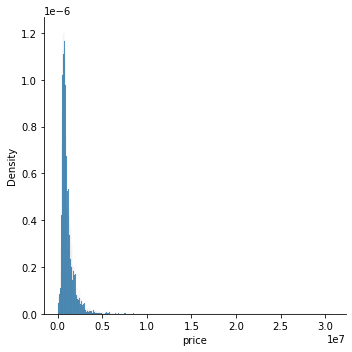

In [130]:
#distribution plot for price
sns.displot(df_cleaned['price'], stat="density");

As suspected the data is `skewed` to the right, we can remove outliers by using log to create a more rebust and accurate model to see if theres improvement.

#### Pair Plot Matrix
The next logical step is to examine a pair plot matrix. This visual representation of pairwise relationships between key variables allows us to uncover potential patterns, correlations, and outliers at a glance.

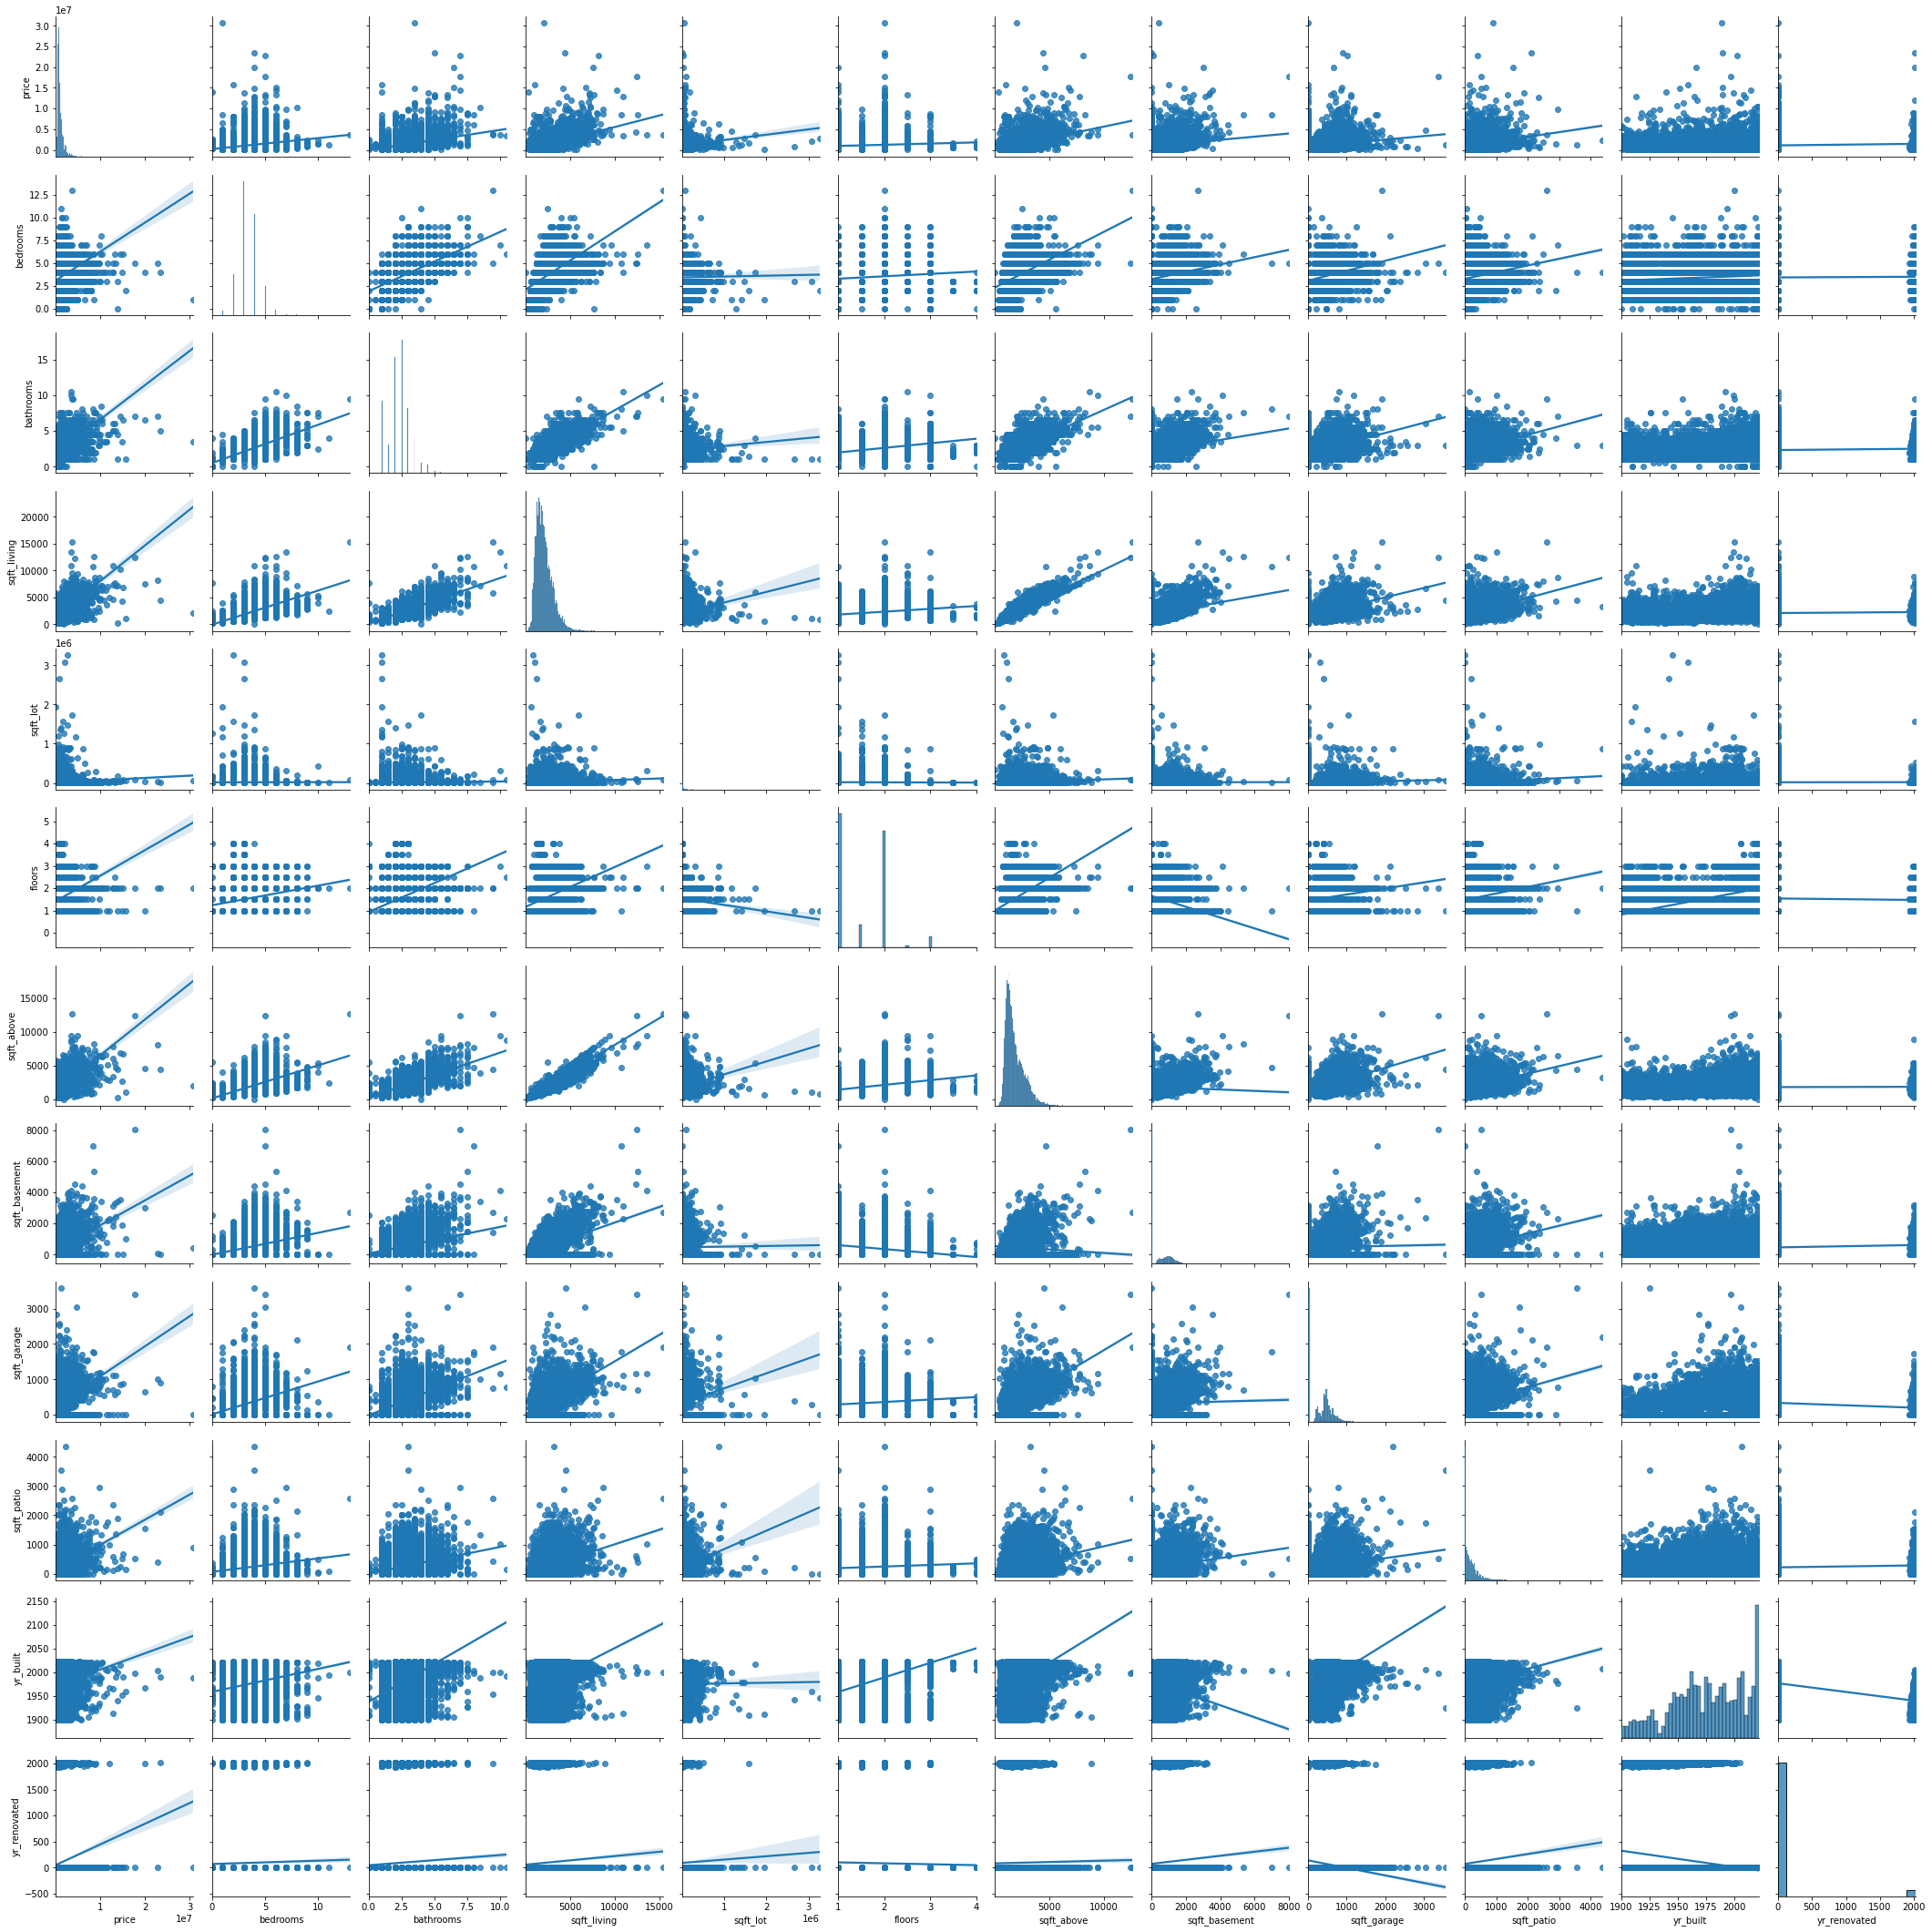

In [15]:
#create a pair plot matrix
sns.pairplot(df_cleaned, kind='reg')
plt.show()

The pair plot provides a visual overview of the relationships between different features. Scatter plots on the diagonal show the distribution of each individual feature.

A heatmap is a graphical representation of data in a matrix format where individual values are represented as colors. This helps visualize relationships between two categorical variables or measure the magnitude of a numeric variable across two categorical variables.

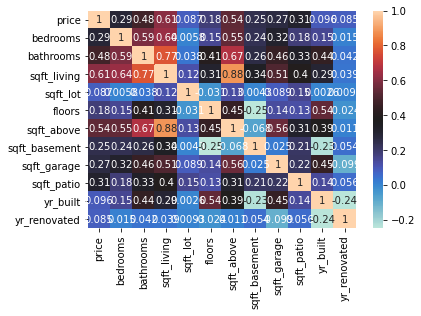

In [16]:
#create a heat map of df_cleaned 
sns.heatmap(df_cleaned.corr(), annot=True, cmap='icefire');

Pair plot and heat map is showing us that `'sqft_living'` has a really high correlation with `'price'`. We can possibly use this feature in our baseline model. 
- Keeping in mind 'sqft_living' **has correlation** with 'bathrooms', 'bedrooms' and 'sqft_above'.

In [131]:
#calculate correlation coefficients with the price
corr = df_cleaned.corr()['price']

#display correlation coefficients in descending order
print(corr.sort_values(ascending=False))

price            1.000000
sqft_living      0.611389
sqft_above       0.541321
bathrooms        0.482142
sqft_patio       0.314264
bedrooms         0.290263
sqft_garage      0.265544
sqft_basement    0.245799
floors           0.181160
yr_built         0.096133
sqft_lot         0.086978
yr_renovated     0.085438
Name: price, dtype: float64


##### 'sqft_living' as dependent variable for Baseline Model

The decision to include `'sqft_living'` as part of the baseline model is based on its high positive correlation with the target variable 'price.' The correlation coefficient between 'sqft_living' and 'price' is approximately `0.611`, indicating a strong linear relationship.

A high positive correlation suggests that as the living area square footage increases, the property's price tends to increase as well. Therefore, 'sqft_living' is a promising feature for predicting housing prices in our baseline model.

# Baseline Model

In [132]:
#copy of cleaned data
df = df_cleaned.copy()

We are going to start with a baseline model using `'sqft_living'`. We are going to look at a scatterplot to show us the relationship between `'price'` and `'sqft_living'`.
###### We can build upon this foundation by incorporating additional features and refining the model as needed during further analysis.



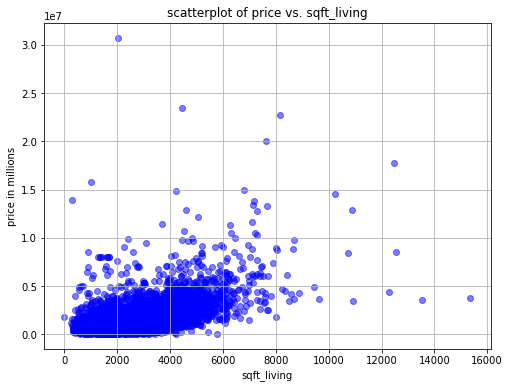

In [133]:
#plot the scatterplot price vs sqft_lving
plt.figure(figsize=(8, 6))
plt.scatter(df['sqft_living'], df['price'], alpha=0.5, marker='o', color='b')
plt.xlabel('sqft_living')
plt.ylabel('price in millions')
plt.title('scatterplot of price vs. sqft_living')
plt.grid(True)
plt.show()

The scatterplot has shown us there a linear relationship between 'price' and 'sqft_living'. This is great to see, we can now move on with our baseline model in confidence.

In [134]:
#creating the baseline model using OLS
X_baseline = df['sqft_living']  #independent variable
Y_baseline = df['price']  #dependent variable

#fit the model
baseline_model = sm.OLS(Y_baseline, sm.add_constant(X_baseline)).fit()

#print the model summary
print(baseline_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.374
Model:                            OLS   Adj. R-squared:                  0.374
Method:                 Least Squares   F-statistic:                 1.794e+04
Date:                Fri, 29 Sep 2023   Prob (F-statistic):               0.00
Time:                        07:37:00   Log-Likelihood:            -4.4737e+05
No. Observations:               30049   AIC:                         8.947e+05
Df Residuals:                   30047   BIC:                         8.948e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -7.79e+04   9754.746     -7.986      

In [135]:
#calculating overall error of model
mae = baseline_model.resid.abs().sum() / len(Y_baseline)
mae

395732.6946735167

### Baseline Model Insights

Based from the baseline model we can quickly see the model is statistically significant. 
- **R-squared:** The R-squared value is 0.374, indicating that around 37.4% of the variance in the 'price' can be explained by the 'sqft_living'.
- **sqft_living:** For every sqft increase the price increases by $561. 
- **Skew and Kurtosis:** These values describe the shape of the residual distribution. High skewness (8.221)
- **Overall Error**: The Mean Absolute Error (MAE) is calculated to assess the overall error of the model's predictions. The MAE is approximately 395,732.69, indicating that, on average, the model's predictions deviate from the actual prices by this amount.

This baseline model provides some insights into the relationship between square footage and housing prices, but it is limited by its simplicity and the fact that it does not account for other potentially important variables that influence housing prices.

**Next lets further inspect regression line and sqft_living distribution.**

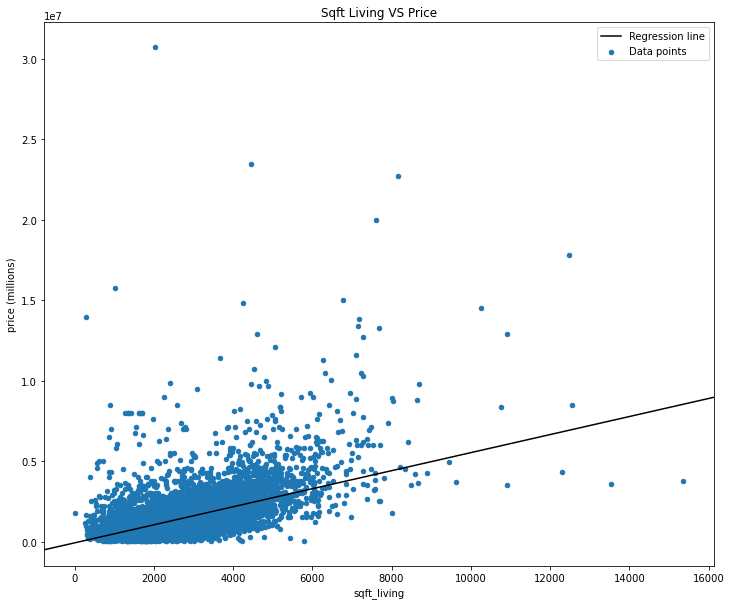

In [136]:
#scatterplot with regression line
fig, ax = plt.subplots(figsize=(12,10))
df.plot.scatter(x="sqft_living", y="price", label="Data points", ax=ax)
sm.graphics.abline_plot(model_results=baseline_model, label="Regression line", ax=ax, color="black")
ax.set_ylabel("price (millions)") 
ax.set_title('Sqft Living VS Price')
ax.legend()
plt.show()

The regressionline visually shows us the linear relationship between `price` and `sqft_living`.

- **Positive Linear Relationship**: The scatterplot reveals a clear upward trend, indicating a positive linear connection between square footage ('sqft_living') and housing prices. As the size of the living space increases, houses tend to become more expensive.

- **Outliers**: Notably, there are outliers, especially among properties with exceptionally high square footage and prices.

- **Regression Line**: The black regression line represents a best-fit linear model that summarizes the overall relationship between square footage and prices. Suggesting how much prices are estimated to rise for each additional square footage unit.

- **Scatter and Spread**: The spread of data points around the regression line implies that factors beyond square footage influence housing prices. This suggests we need a more comprehensive model or additional features to better predict price variations.

The scatterplot with the regression line highlights the positive linear relationship between square footage and housing prices. But it calls attention to outliers.

### Exploring Outliers
Exploring outliers will help us understand the best way to handle them. This can help us build a stronger model.

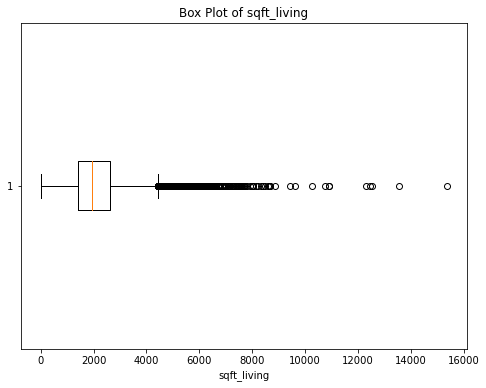

In [137]:
#box plot for 'sqft_living' 
plt.figure(figsize=(8, 6))
plt.boxplot(df['sqft_living'], vert=False)
plt.xlabel('sqft_living')
plt.title('Box Plot of sqft_living')
plt.show()

A **box plot** is great way to visually see if there are any outliers. The box plot above shows us we have outiers in `'sqft_living'`. Removing the outliers may help improve baseline model.

In [138]:
#calculate the first and third quartiles (Q1 and Q3)
Q1 = df['sqft_living'].quantile(0.25)
Q3 = df['sqft_living'].quantile(0.75)

#calculate the interquartile range (IQR)
IQR = Q3 - Q1

#define the lower and upper bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#remove outliers
df_filtered = df[(df['sqft_living'] >= lower_bound) & (df['sqft_living'] <= upper_bound)]

#now we can use df_filtered with no outliers

In [139]:
#sqft_living with no outliers model
X = df_filtered['sqft_living']  #independent variable
Y = df_filtered['price']  #dependent variable

#fit the model
model_filtered = sm.OLS(Y, sm.add_constant(X)).fit()

#print the model summary
print(model_filtered.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.273
Model:                            OLS   Adj. R-squared:                  0.273
Method:                 Least Squares   F-statistic:                 1.100e+04
Date:                Fri, 29 Sep 2023   Prob (F-statistic):               0.00
Time:                        07:37:04   Log-Likelihood:            -4.3153e+05
No. Observations:               29326   AIC:                         8.631e+05
Df Residuals:                   29324   BIC:                         8.631e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.358e+05   9331.041     14.549      

### Filtered Model vs Baseline Model:

**R-squared:**
   - Filtered Model: R-squared is `0.273`, indicating that around 27.3% of the variation in the target variable (price) is explained by the predictor (sqft_living).
   - Baseline Model: R-squared is `0.374`, indicating that around 37.4% of the variation in the target variable (price) is explained by the predictor (sqft_living).

**Baseline Model** outperforms Filtered Model in terms of R-squared, F-statistic, and AIC/BIC. This suggests that Baseline Model provides a better fit to the data and explains more of the variation in the target variable as of now. **Removing outliers in 'sqft_living' was not the best.**

As we saw previouly `'price'` was heavily skewed. Next let's see if performing log transformation on 'price' can further improve our model. 

## log_price Model

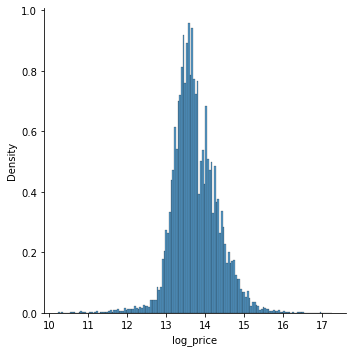

In [140]:
#apply log transformation to the 'price' column
df['log_price'] = np.log(df['price'])

#plot price distribution
sns.displot(df['log_price'], stat="density");

We can now see a **normal distribution** for `'price'` after performing log transformation.

In [141]:
#create variables to log_price model
y_log = df['log_price'] #dependent variable
X = X_baseline.copy() #independent varialble

#fit the model
y_log_model = sm.OLS(y_log, sm.add_constant(X))
y_log_results = y_log_model.fit()

#print the model
print(y_log_results.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.388
Model:                            OLS   Adj. R-squared:                  0.388
Method:                 Least Squares   F-statistic:                 1.902e+04
Date:                Fri, 29 Sep 2023   Prob (F-statistic):               0.00
Time:                        07:37:08   Log-Likelihood:                -18993.
No. Observations:               30049   AIC:                         3.799e+04
Df Residuals:                   30047   BIC:                         3.801e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          12.9490      0.006   2061.925      

### Log Price Model vs Baseline Model:

- **R-squared:** Log Price Model has a slightly higher R-squared value (0.388) compared to Baseline Model (0.374). This suggests that Log Price Model explains a **slightly larger** proportion of the variance in the dependent variable.

- **Coefficient for 'sqft_living':** Log Price Model, for every 1-unit increase in 'sqft_living', the 'log_price' increases by 0.0004%.

- **AIC:** The AIC values are significantly lower for Log Price Model compared to Baseline Model. A lower AIC suggests that Log Price Model is a better fit for the data.

##### We are going to keep using log_price as our dependent variable for future models.

In [142]:
#drop column price
df = df.drop('price', axis=1)

# Exploring Numerical Columns

In [143]:
#calculate correlation coefficients with the price
corr = df.corr()['log_price']

#display correlation coefficients in descending order
print(corr.sort_values(ascending=False))

log_price        1.000000
sqft_living      0.622642
sqft_above       0.548771
bathrooms        0.517129
bedrooms         0.346214
sqft_patio       0.310225
sqft_garage      0.285056
sqft_basement    0.250518
floors           0.236245
yr_built         0.121421
sqft_lot         0.084704
yr_renovated     0.076230
Name: log_price, dtype: float64


Based on correlation coefficients I am considering adding:

**sqft_above**: Another measure of the living area, 'sqft_above' also has a positive correlation of 0.548771 with the log of the price. It represents the living area above ground level.

**bathrooms**: This feature has a correlation of 0.517129 with the log of the price. The number of bathrooms is often a key factor in determining a home's value.

**bedrooms**: While not as strongly correlated as some other features, 'bedrooms' still has a correlation of 0.346214 with the log of the price. The number of bedrooms can influence the overall size and appeal of a house.

**sqft_patio**: This feature has a correlation of 0.310225 with the log of the price. If a house has a patio, its size can contribute to its value.

**floors**: The number of floors in a house has a correlation of 0.236245 with the log of the price. Houses with multiple floors may have different price ranges compared to single-story houses.

#### Pair Plot Matrix of possible features selection
This will help make informed decisions about feature selection.

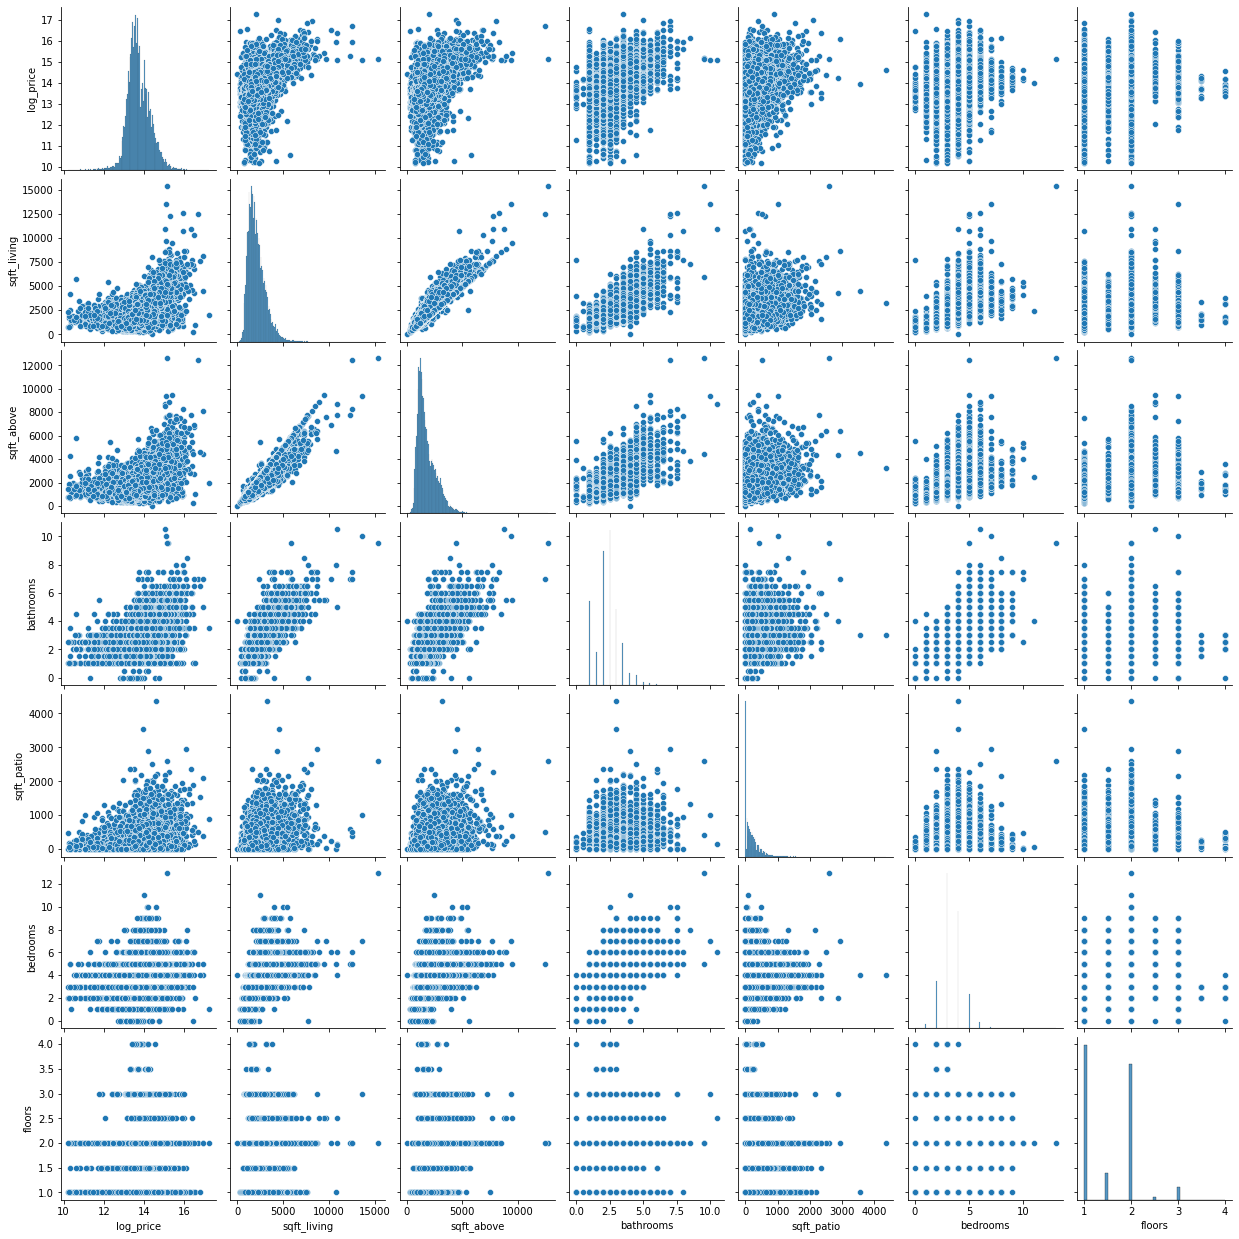

In [144]:
#create a pair plot matrix
selected = ['log_price', 'sqft_living', 'sqft_above', 'bathrooms', 'sqft_patio', 'bedrooms', 'floors']
sns.pairplot(df[selected])
plt.show()


**Observations from Pair Plot:**
After generating a pair plot of the selected features, we can make the following observations:

1. **sqft_living vs. sqft_above:** There seems to be a strong positive linear relationship between these two variables. As the living area (sqft_living) increases, the above-ground area (sqft_above) also tends to increase proportionally.

2. **sqft_living vs. bathrooms:** There appears to be a positive correlation between the living area and the number of bathrooms. Larger homes (higher sqft_living) tend to have more bathrooms.

3. **sqft_living vs. sqft_patio:** There doesn't seem to be a strong correlation between living area and patio area. The points are scattered without a clear linear trend.

4. **sqft_living vs. bedrooms:** Similar to bathrooms, there seems to be a positive correlation between living area and the number of bedrooms. Larger homes (higher sqft_living) tend to have more bedrooms.

5. **sqft_living vs. floors:** The scatter plot suggests that there is no strong linear correlation between living area and the number of floors.

6. **bathrooms vs. sqft_above:** There doesn't seem to be a strong correlation between the number of bathrooms and above-ground area. The points are scattered without a clear linear trend.

7. **bathrooms vs. sqft_patio:** Similarly, there is no strong correlation between the number of bathrooms and patio area.

8. **bathrooms vs. bedrooms:** The scatter plot shows some correlation between the number of bathrooms and bedrooms. However, there are a few outliers where homes have a high number of bathrooms relative to the number of bedrooms.

9. **bathrooms vs. floors:** The plot suggests that there is no strong correlation between the number of bathrooms and the number of floors.

10. **sqft_above vs. sqft_patio:** There doesn't seem to be a strong correlation between above-ground area and patio area.

11. **sqft_above vs. bedrooms:** The scatter plot shows some correlation between above-ground area and the number of bedrooms.

12. **sqft_above vs. floors:** There is no strong linear correlation between above-ground area and the number of floors.

13. **sqft_patio vs. bedrooms:** There appears to be no strong correlation between patio area and the number of bedrooms.

14. **sqft_patio vs. floors:** Similarly, there is no strong correlation between patio area and the number of floors.

Based on these observations I will be adding and changing features to best avoid multicollinearity. 

With `'sqft_living'` and `'sqft_above'` I will add a new feature as `'total_sqft'` it will include 'sqft_above' and 'sqft_basement' as one feature and will not include 'sqft_living' in our model.

##### Exploring Box Plots for Selected Features 

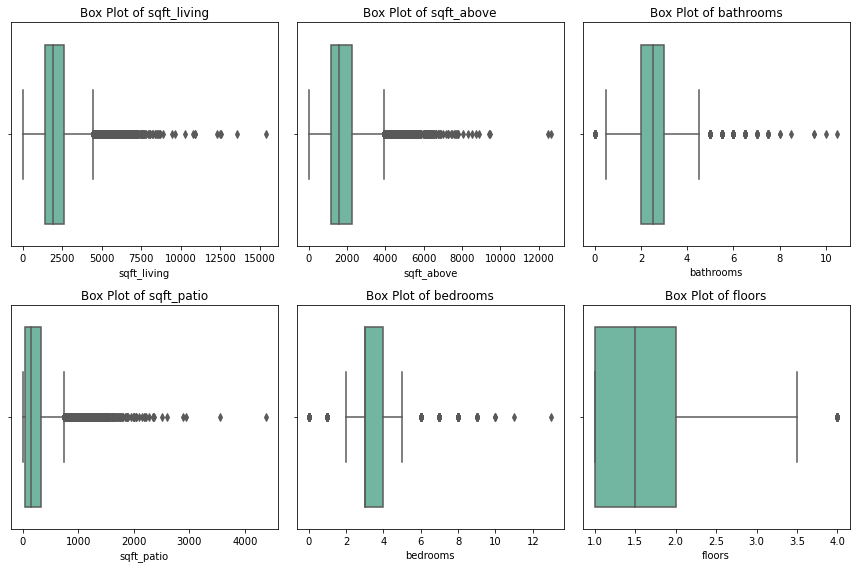

In [145]:
#list of selected features
selected_features = ['sqft_living', 'sqft_above', 'bathrooms', 'sqft_patio', 'bedrooms', 'floors']

#create box plots for each selected feature
plt.figure(figsize=(12, 8))

for i, feature in enumerate(selected_features, 1):
    plt.subplot(2, 3, i)  #2 rows, 3 columns of subplots
    sns.boxplot(data=df, x=feature, palette='Set2')
    plt.title(f'Box Plot of {feature}')
    plt.xlabel(feature)

#spacing between subplots
plt.tight_layout()  
plt.show()

Based on each box plot we have found:

- **sqft_living**: Shows a wide range of values, with some potential outliers on the higher end.

- **sqft_above**: A similar distribution pattern to 'sqft_living,' indicating that these two features might be closely related. 

- **bathrooms**: We can see. majority of houses have a relatively small number of bathrooms, with some outliers on the higher side.

- **sqft_patio**: There's a variability in patio sizes, with potential outliers indicating larger patios.

- **bedrooms**: Most houses have a moderate number of bedrooms, while a few have significantly more, potentially indicating larger properties.

- **floors**: This box plot represents the number of floors in the houses. It reveals that single-floor houses are common, with some exceptions that have more floors.

##### Next Steps:
- Create a new feature `'sqft_total'`. Since 'sqft_living' and 'sqft_above' have a close relationship, I will take the total of 'sqft_above' + 'sqft_basement' to get 'sqft_total'.
- We can see there's a wide distribution of floors. Maybe the larger the home means more floors or bedrooms?

### Creating new feature 'sqft_total'

In [146]:
#adding new column 'sqft_total'
df['sqft_total'] = df['sqft_above'] + df['sqft_basement']

***Next step look at 'floors' and 'bedrooms' distribution***

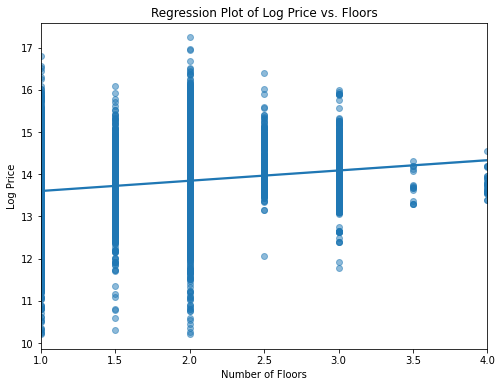

In [147]:
#regression plot log price and floors
plt.figure(figsize=(8, 6))
sns.regplot(data=df, x='floors', y='log_price', scatter_kws={'alpha':0.5})
plt.xlabel('Number of Floors')
plt.ylabel('Log Price')
plt.title('Regression Plot of Log Price vs. Floors')
plt.show()

Based on the graph showing the relationship between `'floors'` and `'log_price'`:

- **Price Distribution**: The majority of housing prices are concentrated within a specific range.

- **Regression Line**: There's a general upward line. As the number of floors increases, the housing prices tend to rise as well. This suggests that the number of floors might be a relevant factor in predicting housing prices.

`'floors'` will be used as feature in our model

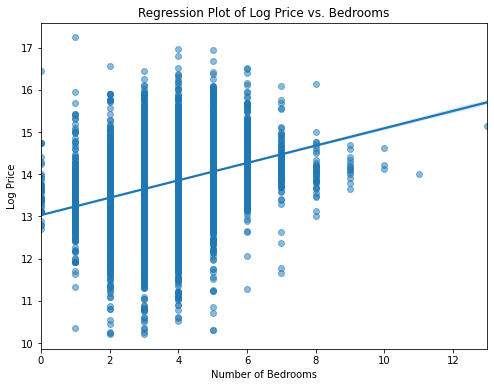

In [148]:
#regression plot log price and bedrooms
plt.figure(figsize=(8, 6))
sns.regplot(data=df, x='bedrooms', y='log_price', scatter_kws={'alpha':0.5})
plt.xlabel('Number of Bedrooms')
plt.ylabel('Log Price')
plt.title('Regression Plot of Log Price vs. Bedrooms')
plt.show()

Based on the plot above the spread of data points and regression line it reveals the variability in the relationship.

`'bedrooms'` will be used as feature in our model

## Model 1: adding features
`'sqft_living', 'sqft_above', 'bedrooms', 'floors'` will be added in our next model.

In [149]:
#creating variables to Model 1
y_log = df['log_price'] #dependent variable
X_model1 = df[['sqft_living', 'sqft_above', 'bedrooms', 'floors']] #independent variable

#fit the model
model_1 = sm.OLS(y_log, sm.add_constant(X_model1))
model1_results = model_1.fit()

#print model summary
print(model1_results.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.394
Model:                            OLS   Adj. R-squared:                  0.394
Method:                 Least Squares   F-statistic:                     4891.
Date:                Fri, 29 Sep 2023   Prob (F-statistic):               0.00
Time:                        07:37:54   Log-Likelihood:                -18828.
No. Observations:               30049   AIC:                         3.767e+04
Df Residuals:                   30044   BIC:                         3.771e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          12.9866      0.011   1143.102      

#### Model 1 Insights:
- **R-squared**: The R-squared value is approximately 0.394, indicating that this model accounts for about 39.4% of the variance in 'log_price.' This suggests that the selected independent variables explain a substantial portion of the variation in housing prices.

- **Adjusted R-squared**: The adjusted R-squared value remains at 0.394, considering the model's degrees of freedom. It reaffirms the model's explanatory power.

- **F-statistic**: The F-statistic is 4891, with a very low p-value (0.00). This indicates that the overall model is statistically significant.

- **Log-Likelihood**: The log-likelihood value is -18828, representing the maximized log-likelihood function.

- **AIC and BIC**: The AIC (Akaike Information Criterion) and BIC (Bayesian Information Criterion) values help assess model fit. Lower values are preferred, and in this case, they indicate a relatively good model fit.

##### Coefficients

- **Constant (Intercept)**: The constant term is 12.9866, representing the estimated 'log_price' when all other independent variables are zero.

- **sqft_living**: The coefficient for 'sqft_living' is 0.0004, implying that, on average, each unit increase in square footage leads to an increase of 0.0004%.

- **sqft_above**: The coefficient for 'sqft_above' is -3.932e-05, indicating that, on average, each unit increase in square footage above ground level leads to a decrease.

- **bedrooms**: The coefficient for 'bedrooms' is -0.0487, suggesting that, on average, each additional bedroom is associated with a decrease of 0.0487.

- **floors**: The coefficient for 'floors' is 0.0582, indicating that, on average, each additional floor is associated with an increase of 0.0582.

- **Condition Number**: The large condition number (1.4e+04) may indicate potential multicollinearity among the independent variables.

**The condition number to Model 1 is large, meaning there might be multicollinearity and should be assesed.**

### Checking to see if selected values are correlated with one another

In [150]:
import pandas as pd

#create correlation matrix
correlation_matrix = X_model1.corr()

#set the correlation threshold
correlation_threshold = 0.7

#find highly correlated feature pairs
highly_correlated_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            pair = (correlation_matrix.columns[i], correlation_matrix.columns[j])
            highly_correlated_pairs.append(pair)

#print the highly correlated feature pairs
for pair in highly_correlated_pairs:
    print(f'Highly correlated pair: {pair[0]} - {pair[1]} (Correlation: {correlation_matrix.loc[pair[0], pair[1]]:.2f})')



Highly correlated pair: sqft_living - sqft_above (Correlation: 0.88)


**As suspected:** 'sqft_living' and 'sqft_above' are highly correlated, it will be best to add new feature `'sqft_total'` that was created. Before moving forward we will look at the linear realationship between the two variables.

##### This new feature represents the total square footage of both above-grade and basement areas.

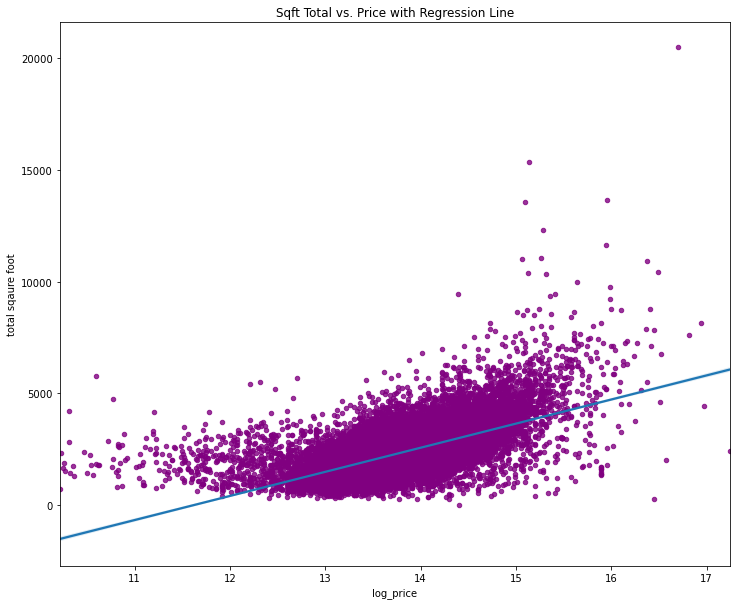

In [151]:
#scatterplot with regression line
plt.figure(figsize=(12, 10))
sns.regplot(x='log_price', y='sqft_total', data=df, scatter_kws={'s': 20, 'color': 'purple'})
plt.xlabel('log_price')
plt.ylabel('total sqaure foot')
plt.title('Sqft Total vs. Price with Regression Line')
plt.show()

**Positive Linear Relationship**: As we move from left to right along the x-axis (higher 'log_price'), we generally see an upward trend on the y-axis (greater 'sqft_total'). In simpler terms, homes with higher logarithmic prices tend to have larger total square footages.

**Regression Line:** The purple regression line illustrates this positive relationship more clearly. It's a mathematical representation of how the two variables are related. When the line slopes upwards, it indicates that as 'log_price' increases, 'sqft_total' tends to increase as well.

**Scatter Points**: Each purple point on the graph represents an individual data point, showing the 'log_price' and 'sqft_total' for a specific home. These points are scattered around the regression line, highlighting the variability in the dataset. Some homes deviate from the trend, but the overall pattern is still evident.


### Model 2: using new feature 'sqft_total'

In [152]:
#creating the baseline model using OLS
X_model2 = df[['sqft_total', 'bedrooms', 'floors']]  #independent variable
Y = df['log_price']  #dependent variable

#fit the model
model_2 = sm.OLS(Y, sm.add_constant(X_model2)).fit()

#print the model summary
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.387
Model:                            OLS   Adj. R-squared:                  0.387
Method:                 Least Squares   F-statistic:                     6329.
Date:                Fri, 29 Sep 2023   Prob (F-statistic):               0.00
Time:                        07:38:01   Log-Likelihood:                -19004.
No. Observations:               30049   AIC:                         3.802e+04
Df Residuals:                   30045   BIC:                         3.805e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.8722      0.011   1148.800      0.0

##### Model Comparison
**Model 2:**
- R-squared: 0.387
- Features: 'sqft_total', 'bedrooms', 'floors'
- AIC: 3.802e+04

###### Coefficients:
- 'sqft_total': Is approximately 0.0004 meaning, each additional square foot of total space, there is an expected increase of approximately 0.0004 in the log-transformed price.

- 'bedrooms': Is -0.0249, an increase in the number of bedrooms is associated with a decrease in the log-transformed price.

- 'floors': Is 0.0909, suggesting that an increase in the number of floors is correlated with a higher log-transformed price.


**Model 1 vs Model 2:**
- Model 2 has a `lower AIC`, which measures model goodness-of-fit, suggesting it may be a better fit for the data, despite having fewer features.

**In order to further improve model we need to add categorical features. Adding categorical features to the model is essential. Categorical variables contain valuable information that can influence the outcome you're trying to predict.**

### Exploring and Transforming Categorical Variables

To work with categorical data and prepare it for modeling, a copy of the original DataFrame will be created. This will ensure the original data remains unchanged and available for reference. The new dataframe, `df_categorical`, will be used for further processing and encoding of categorical features.

In [153]:
#copying DataFrame and Preparing Categorical Data
df_categorical = df.copy()

In [154]:
#setting categorical variables to start further exlopring columns
categorical_columns = df_categorical.select_dtypes(include='object')

#taking a look at categorical columns
categorical_columns.head(10)

,waterfront,greenbelt,nuisance,view,condition,grade,heat_source,sewer_system
0,NO,NO,NO,NONE,Good,7 Average,Gas,PUBLIC
1,NO,NO,YES,AVERAGE,Average,7 Average,Oil,PUBLIC
2,NO,NO,NO,AVERAGE,Average,7 Average,Gas,PUBLIC
3,NO,NO,NO,AVERAGE,Average,9 Better,Gas,PUBLIC
4,NO,NO,YES,NONE,Average,7 Average,Electricity,PUBLIC
5,NO,NO,YES,NONE,Average,7 Average,Electricity,PUBLIC
6,NO,NO,NO,AVERAGE,Good,9 Better,Oil,PRIVATE
7,NO,NO,NO,NONE,Average,8 Good,Gas,PUBLIC
8,NO,NO,NO,NONE,Average,8 Good,Gas,PUBLIC
9,NO,NO,NO,AVERAGE,Average,8 Good,Gas,PUBLIC


**Insights from the table:**
- Waterfront: Indicates whether the property is located by the waterfront (YES/NO).
- Greenbelt: Indicates whether the property is adjacent to a greenbelt area (YES/NO).
- Nuisance: Indicates whether the property has a nuisance factor (YES/NO).
- View: Represents the level of view quality (NONE, AVERAGE, GOOD).
- Condition: Describes the overall condition of the property.
- Grade: Represents the grade assigned to the property.
- Heat Source: Indicates the source of heat for the property (Gas, Oil, Electricity).
- Sewer System: Indicates the type of sewer system (PUBLIC, PRIVATE).

**Next further explore distribution to better understand columns.**

### Distribution of Categorical Features

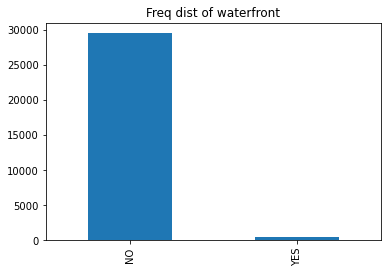

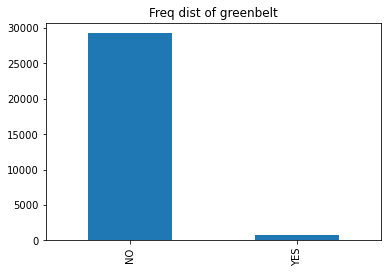

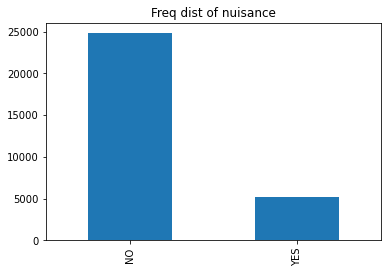

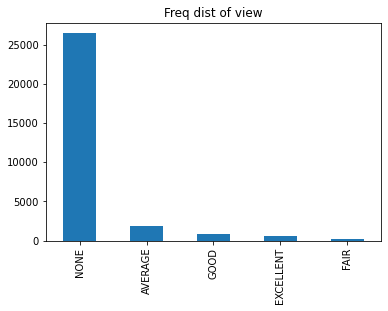

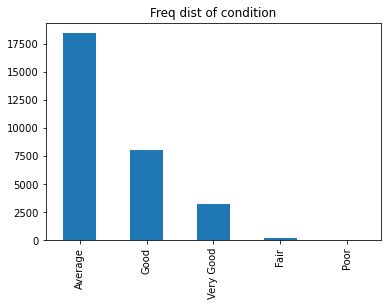

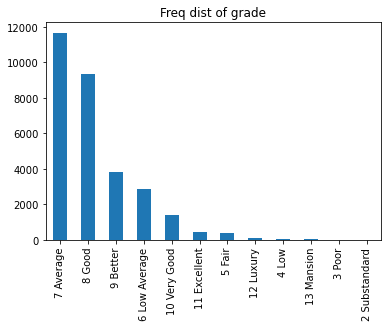

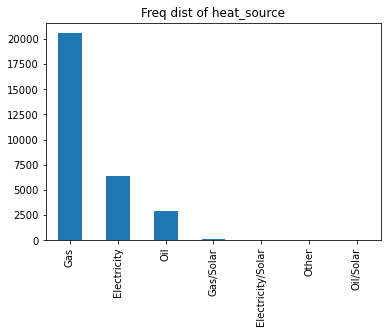

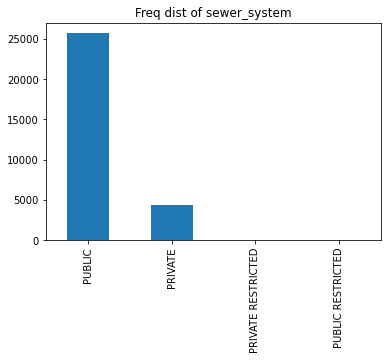

In [155]:
#going through each object features and look at the distributions.
for col in categorical_columns:
    df_categorical[col].value_counts().plot.bar(title = 'Freq dist of ' + col)
    plt.show()

#### Bar plots insights:

- **Waterfront:** The distribution plot indicates that a vast majority of instances are categorized as 'No waterfront,' while 'Waterfront' properties are notably less common. 

- **Greenbelt:** Most of the properties do not have a 'Greenbelt' attribute, making it the dominant category.

- **Nuisance:** The distribution shows that a significant number of properties have 'No nuisance' reported, with instances of 'Nuisance' being fewer in comparison.

- **View:** Instances with 'No view' are substantially more common than those with different view levels. Views are skewed towards the '0' category.

- **Condition:** The majority of properties are in 'Average' condition, while instances in 'Good' or 'Fair' condition are comparatively lower in number. They will be change into 3 categories later.

- **Grade:** The distribution of grades shows that properties with '7' and '8' grades are the most common, while higher and lower grades are less frequent.
 
- **Heat Source:** Properties primarily rely on 'Electricity' and 'Gas' as heat sources, with 'Electricity' being more prevalent.

- **Sewer System:** The distribution plot indicates that most properties are connected to the 'Sewer connected' system, while 'Septic system' connections are less frequent.

##### From these insights we can move foward to explore more 'waterfront', 'view', 'condition', 'grade', 'heat_source' and 'sewer_system'
- Make note of 'heat_source', possibly adding a 'other'. (ex. 'gas' , 'electricity' and 'other')

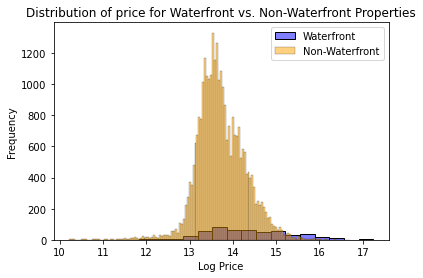

In [156]:
#filtering the dataframe for properties with and without waterfront
waterfront_properties = df_categorical[df_categorical['waterfront'] == 'YES']
non_waterfront_properties = df_categorical[df_categorical['waterfront'] == 'NO']

#creating a combined distribution plot
sns.histplot(data=waterfront_properties, x='log_price', label='Waterfront', color='blue', alpha=0.5)
sns.histplot(data=non_waterfront_properties, x='log_price', label='Non-Waterfront', color='orange', alpha=0.5)

#set labels and title
plt.xlabel('Log Price')
plt.ylabel('Frequency')
plt.title('Distribution of price for Waterfront vs. Non-Waterfront Properties')
plt.legend()

#show plot
plt.show()

As suspected, based on the graph we can see the distribution of `waterfront properties` is a flat distribution. You would expect to see a relatively constant line with no change. Exlploring waterfront properties alone may give us a better understanding of distrubution.

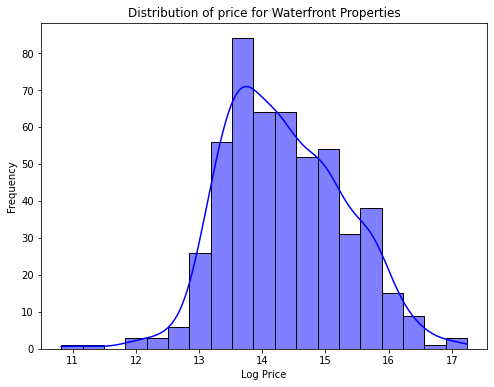

In [157]:
#filter the DataFrame for 'waterfront' = 'YES'
waterfront_yes = df[df['waterfront'] == 'YES']

#distribution plot for 'log_price'
plt.figure(figsize=(8, 6))
sns.histplot(waterfront_yes['log_price'], kde=True, color='blue')
plt.title('Distribution of price for Waterfront Properties')
plt.xlabel('Log Price')
plt.ylabel('Frequency')
plt.show()


It appears waterfront properties tend to have a **higher** price due to the distribution's shift towards higher 'log_price' values. The majority of waterfront properties appear to have 'log_price' values that are notably higher compared to non-waterfront properties.

**Next exploring and transforming 'heat_source'.**

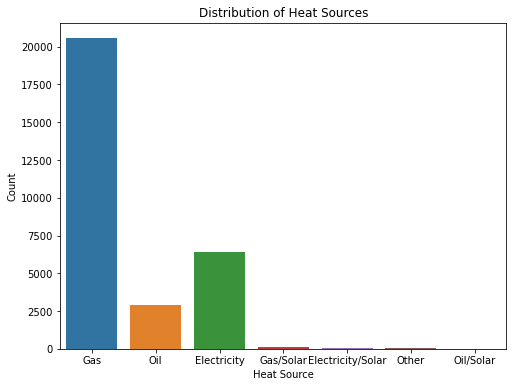

In [158]:
# Create a distribution plot
plt.figure(figsize=(8, 6))  # Adjust the figure size if needed
sns.countplot(data=df_categorical, x='heat_source')
plt.title('Distribution of Heat Sources')
plt.xlabel('Heat Source')
plt.ylabel('Count')

plt.show()

Based on the graph we can see which heat sources are more commonly used and which are less prevalent. Gas, oils and electricity are common heat sources used vs others.


In [159]:
#value count for 'heat_source' to further investigate 
df_categorical['heat_source'].value_counts()

Gas                  20565
Electricity           6410
Oil                   2898
Gas/Solar               93
Electricity/Solar       59
Other                   20
Oil/Solar                4
Name: heat_source, dtype: int64

Based on our histogram value count of 'heat_source' values. It will be best to change values that are not 'gas', 'electricity' and 'oil' in a `'other'` category.

In [160]:
#creating a new value category for 'Other' in 'heat_source'
selected_sources = ['Gas', 'Electricity', 'Oil']
df_categorical['heat_source'] = df_categorical['heat_source'].where(df_categorical['heat_source'].isin(selected_sources), 'Other')

#printing the updated value counts
df_categorical['heat_source'].value_counts()



Gas            20565
Electricity     6410
Oil             2898
Other            176
Name: heat_source, dtype: int64

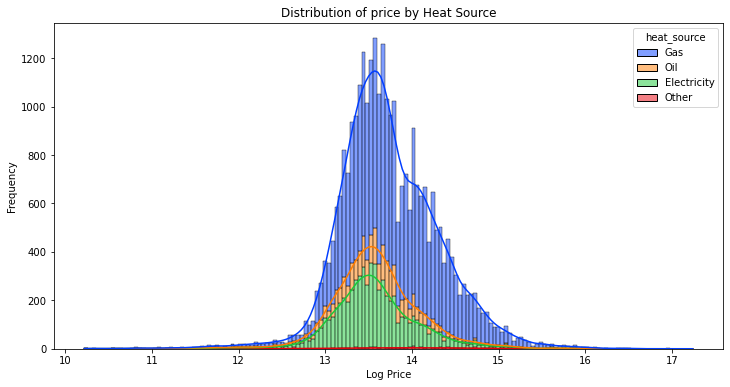

In [162]:
#filter the DataFrame for specific 'heat_source' values
heat_source_values = ['Gas', 'Oil', 'Electricity', 'Other']
filtered_df = df_categorical[df_categorical['heat_source'].isin(heat_source_values)]

#distribution plot for each category
plt.figure(figsize=(12, 6))
sns.histplot(data=filtered_df, x='log_price', kde=True, hue='heat_source', multiple='stack', palette='bright', legend=True)
plt.title('Distribution of price by Heat Source')
plt.xlabel('Log Price')
plt.ylabel('Frequency')
plt.show()

The graph shows us majority of the homes in the dataset use gas heating, followed by electricity, with oil heating being less common.
- Homes with gas heating tend to have a wide range of prices, with some lower-priced and higher-priced properties.
- Oil heating is associated with a narrower price range, predominantly at the higher end of the spectrum.
- Electricity and other heating sources show more diverse price distributions, including both lower and higher-priced homes.

#### Exploring and transforming grade

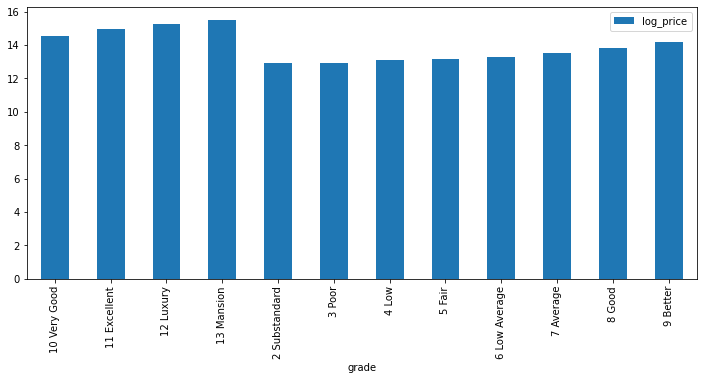

In [163]:
#bar plot of grade distribution
fig, ax = plt.subplots(figsize=(12,5))
df_categorical.groupby("grade").mean().plot.bar(y="log_price", ax=ax);

From the plot, we see as 'grade' of properties increases, the average 'log_price' also tends to rise. This suggests that 'grade' is a `significant factor` influencing housing prices, with higher-grade properties generally command higher prices. We also see its a ordinal category that needs to be changed.


In [164]:
#mapping of the ordinal categories to their corresponding numeric value
grade_mapping = {"2 Substandard": 2, "4 Low": 4, "5 Fair":5, "6 Low Average": 6, 
     "7 Average": 7, "8 Good": 8, "9 Better": 9, "10 Very Good": 10, 
     "11 Excellent": 11, "12 Luxury": 12, "13 Mansion": 13}

#adding mapped values to df_kc
df_categorical['grade'] = df_categorical['grade'].map(grade_mapping)

#taking a look if values we changed
print(df_categorical['grade'])

0        7.0
1        7.0
2        7.0
3        9.0
4        7.0
        ... 
30150    8.0
30151    7.0
30152    7.0
30153    8.0
30154    7.0
Name: grade, Length: 30049, dtype: float64


In [165]:
#list of grade values from 2 to 13
grade_values = list(range(2, 14))

#create subplots
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))
fig.subplots_adjust(hspace=0.5)

#loop through each grade value and create distribution plots
for i, grade in enumerate(grade_values):
    row, col = divmod(i, 4)
    ax = axes[row, col]

    #filter the data for the current grade value
    filtered_df = df_categorical[df_categorical['grade'] == grade]

    #distribution plot for the current grade
    sns.histplot(data=filtered_df, x='log_price', kde=True, ax=ax)
    ax.set_title(f'Distribution of log_price for Grade {grade}')
    ax.set_xlabel('Log Price'')
    ax.set_ylabel('Frequency')

#spacing between subplots
plt.tight_layout()
plt.show()


SyntaxError: EOL while scanning string literal (<ipython-input-165-77cbde564e6c>, line 19)

The series of distribution plots provides insights into the relationship between the 'grade'. As the 'grade' value **increases**, the distribution of 'log_price' tends to **shift** towards higher values. This suggests a positive correlation between the 'grade' of a property and its 'log_price.'


#### Exploring and Transforming View

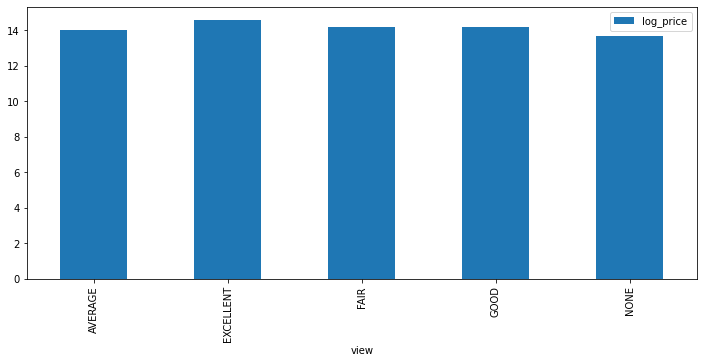

In [166]:
#bar plot of view distribution
fig, ax = plt.subplots(figsize=(12,5))
df_categorical.groupby("view").mean().plot.bar(y="log_price", ax=ax);

The bars have similar heights, indicating that the level of view might not have a strong influence on the average price of houses. Some 'view' categories have notably higher average 'log_price' values, while others have lower averages, indicating a relationship between the view quality and property pricing. It appears to be a relevant feature in predicting housing prices.

In [167]:
#define dictionary to map categorical values to numeric values
view_mapping = {
    'EXCELLENT': 4,
    'GOOD': 3,
    'AVERAGE': 2,
    'FAIR': 1,
    'NONE': 0
}

#map the values in the 'view' column using the defined mapping
df_categorical['view'] = df_categorical['view'].map(view_mapping)

#display the unique values and their corresponding numeric values
unique_views = df_categorical['view'].drop_duplicates()
print(df_categorical['view'])


0        0
1        2
2        2
3        2
4        0
        ..
30150    0
30151    1
30152    0
30153    0
30154    0
Name: view, Length: 30049, dtype: int64


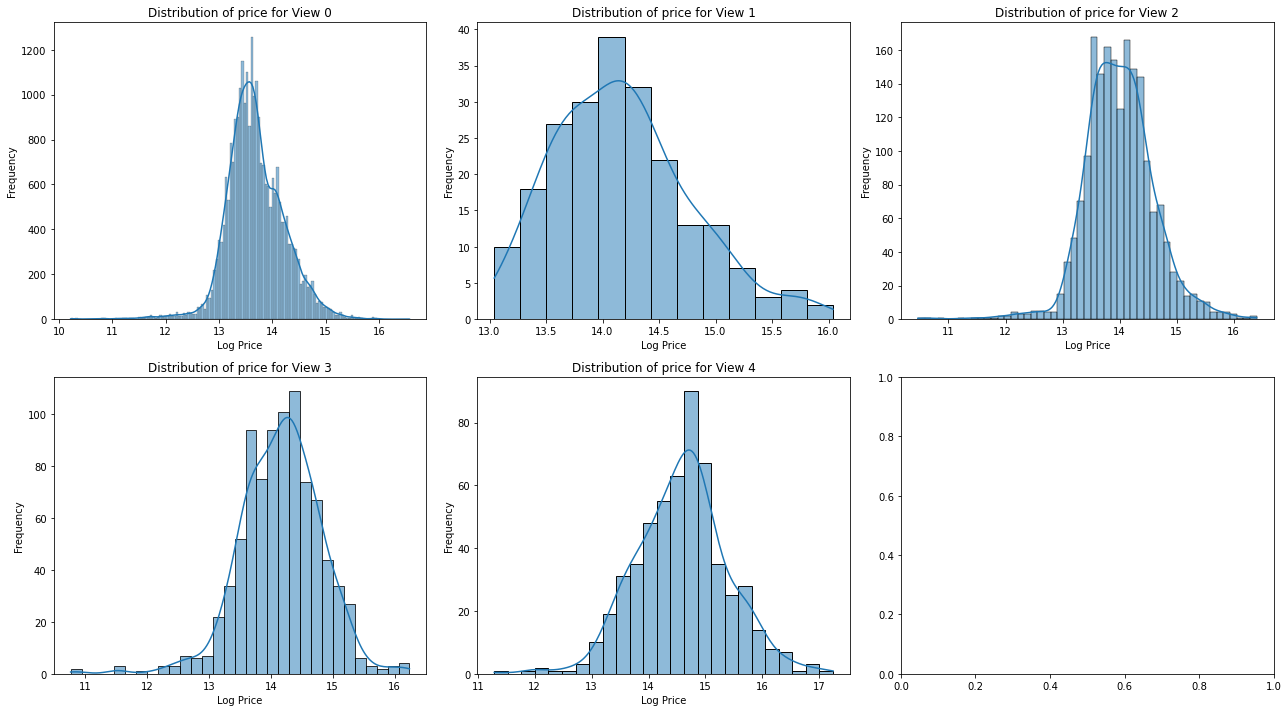

In [168]:
#view values
view_values = (0, 1, 2, 3, 4)

#subplots size
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
fig.subplots_adjust(wspace=0.4, hspace=0.4)

#loop through each view value and create distribution plots
for i, view in enumerate(view_values):
    row = i // 3
    col = i % 3   
    ax = axes[row, col]

    #filter the DataFrame for the current view value
    filtered_df = df_categorical[df_categorical['view'] == view]

    #create a distribution plot for the current view
    sns.histplot(data=filtered_df, x='log_price', kde=True, ax=ax)
    ax.set_title(f'Distribution of price for View {view}')
    ax.set_xlabel('Log Price')
    ax.set_ylabel('Frequency')

#adjust spacing between subplots
plt.tight_layout()
plt.show()



The plots demonstrate that the 'grade' feature plays a crucial role in predicting home prices, and **higher** grades are generally associated with **higher** log prices.

#### Exploring and Transforming Condition

As mentioned before `'condition'` will be sorted out in 3 categories instead of 5.

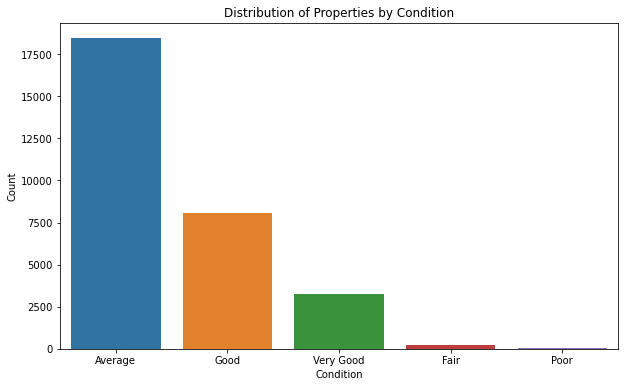

In [169]:
#bar plot for the 'condition' distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df_categorical, x='condition', order=df_categorical['condition'].value_counts().index)
plt.title('Distribution of Properties by Condition')
plt.xlabel('Condition')
plt.ylabel('Count')

#show plot
plt.show()

The bar plot provides insights into the distribution of properties based on their 'condition' categories. Key takeaways from this visualization include:

dictive modeling, may be necessary.

This visualization serves as an initial exploration of the 'condition' feature's distribution, offering valuable insights into the dataset's property conditions.b


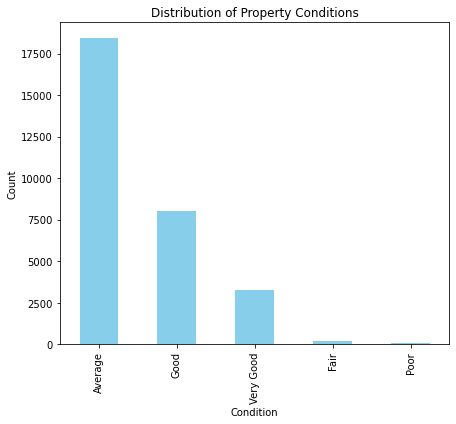

In [170]:
import matplotlib.pyplot as plt

#count the occurrences of each 'condition' category
condition_counts = df_categorical['condition'].value_counts()

#create subplots for conditions
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
condition_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Property Conditions')
plt.xlabel('Condition')
plt.ylabel('Count')

#adjust the spacing between subplots
plt.tight_layout()

#show plot
plt.show()


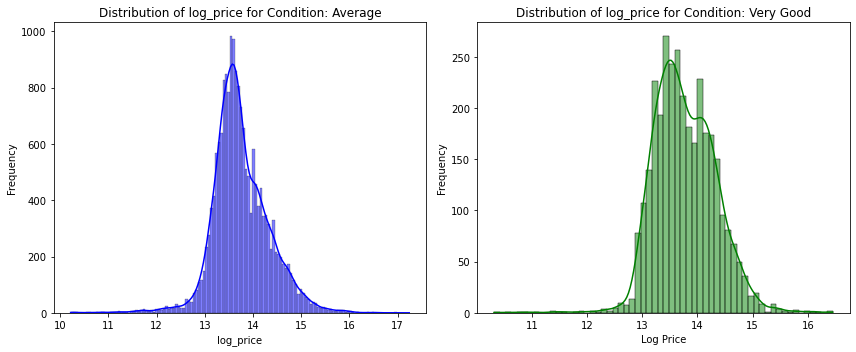

In [171]:
#filter the data for 'condition' values 'Average' and 'Very Good'
condition_average = df[df['condition'] == 'Average']
condition_above_average = df[df['condition'] == 'Very Good']

#create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

#plot 'Average' condition
sns.histplot(data=condition_average, x='log_price', kde=True, color='blue', ax=axes[0])
axes[0].set_title('Distribution of log_price for Condition: Average')
axes[0].set_xlabel('log_price')
axes[0].set_ylabel('Frequency')

#plot 'Very Good' condition
sns.histplot(data=condition_above_average, x='log_price', kde=True, color='green', ax=axes[1])
axes[1].set_title('Distribution of log_price for Condition: Very Good')
axes[1].set_xlabel('Log Price')
axes[1].set_ylabel('Frequency')

#spacing for plot
plt.tight_layout()

plt.show()


These distribution plots provide insights into how the 'condition' of properties, specifically 'average' and 'above_average,' relates to their pricing. The plot for `'Above Average'` condition properties (in green) shows a shift towards **higher** 'log_price' values compared to 'Average' condition properties (in blue). This suggests that properties with a 'Very Good' condition tend to command higher prices, indicating a potential premium associated with superior property conditions.

In [172]:
#changing values in 'condition' to fall under 3 values.
df_categorical['condition'] = df_categorical['condition'].replace({
    'Average': 'Average',
    'Good': 'Below Average',
    'Very Good': 'Above Average',
    'Fair': 'Below Average',
    'Poor': 'Below Average'
})

print(df_categorical['condition'].value_counts())

Average          18453
Below Average     8338
Above Average     3258
Name: condition, dtype: int64


#### Since we have some categorical columns, I will be using one-hot ecoded to start exploring coefficients.

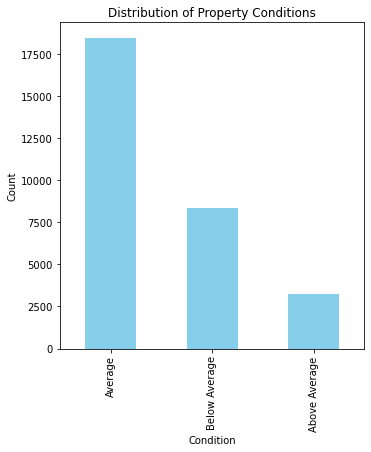

In [177]:
import matplotlib.pyplot as plt

#count the occurrences of each 'condition' category
condition_counts = df_categorical['condition'].value_counts()

#create subplots for conditions
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
condition_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Property Conditions')
plt.xlabel('Condition')
plt.ylabel('Count')

#show the subplots
plt.show()


- Next lets look at coeffiecients relationships to price. Before moving forward we will need finish transforming categorical data.

In [178]:
#saving a copy of df_categorical
df_encoded = df_categorical.copy()

In [179]:
#selecting categorical columns

categorical_cols = ['condition', 'nuisance', 'heat_source', 'waterfront', 'sewer_system', 'greenbelt']

#one-hot encoding to convert categorical columns
df_encoded = pd.get_dummies(df_encoded, columns=categorical_cols)

#taking a look at encoded dataframe
df_encoded.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,grade,sqft_above,sqft_basement,sqft_garage,...,heat_source_Oil,heat_source_Other,waterfront_NO,waterfront_YES,sewer_system_PRIVATE,sewer_system_PRIVATE RESTRICTED,sewer_system_PUBLIC,sewer_system_PUBLIC RESTRICTED,greenbelt_NO,greenbelt_YES
0,4,1.0,1180,7140,1.0,0,7.0,1180,0,0,...,0,0,1,0,0,0,1,0,1,0
1,5,2.5,2770,6703,1.0,2,7.0,1570,1570,0,...,1,0,1,0,0,0,1,0,1,0
2,6,2.0,2880,6156,1.0,2,7.0,1580,1580,0,...,0,0,1,0,0,0,1,0,1,0
3,3,3.0,2160,1400,2.0,2,9.0,1090,1070,200,...,0,0,1,0,0,0,1,0,1,0
4,2,2.0,1120,758,2.0,0,7.0,1120,550,550,...,0,0,1,0,0,0,1,0,1,0


In [180]:
#get null values count
df_encoded.isnull().sum()

bedrooms                           0
bathrooms                          0
sqft_living                        0
sqft_lot                           0
floors                             0
view                               0
grade                              9
sqft_above                         0
sqft_basement                      0
sqft_garage                        0
sqft_patio                         0
yr_built                           0
yr_renovated                       0
log_price                          0
sqft_total                         0
condition_Above Average            0
condition_Average                  0
condition_Below Average            0
nuisance_NO                        0
nuisance_YES                       0
heat_source_Electricity            0
heat_source_Gas                    0
heat_source_Oil                    0
heat_source_Other                  0
waterfront_NO                      0
waterfront_YES                     0
sewer_system_PRIVATE               0
s

Here we can see there are missing values in `'grade'`, we will fill them with the **mean** of all the values in 'grade'.

In [181]:
#fill missing values in 'grade' column with the mean value
mean_grade = df_encoded['grade'].mean()
df_encoded['grade'].fillna(mean_grade, inplace=True)

In [182]:
#drop irrelevant columns
df_encoded.drop(['sqft_living', 'sqft_above'], axis=1, inplace=True)

In [183]:
#calulate correlation coefficients with 'log_price'
corrfinal = df_encoded.corr()['log_price']

#display correlation coefficients in descending order
print(corrfinal.sort_values(ascending=False))

log_price                          1.000000
sqft_total                         0.615465
grade                              0.615240
bathrooms                          0.517129
bedrooms                           0.346214
sqft_patio                         0.310225
sqft_garage                        0.285056
view                               0.275145
sqft_basement                      0.250518
floors                             0.236245
heat_source_Gas                    0.183429
waterfront_YES                     0.138737
yr_built                           0.121421
greenbelt_YES                      0.097253
sqft_lot                           0.084704
yr_renovated                       0.076230
sewer_system_PUBLIC                0.033164
condition_Average                  0.030575
condition_Above Average            0.022347
heat_source_Other                  0.017339
nuisance_NO                        0.006910
sewer_system_PUBLIC RESTRICTED     0.000530
nuisance_YES                    

Based on the correlation to `'log_price'` it would be best to add to our next model:
- 'grade'
- 'bathrooms' 
- 'sqft_lot
- 'sqft_garage'
- 'sqft_patio'
- 'view'
- 'heat_source_Gas'
- 'waterfront_YES'
- 'condition_ABOVE Average'
- 'condition_Very Good'


In [184]:
model_3_features =  ['sqft_total', 'grade', 'bathrooms', 'sqft_lot', 'sqft_garage', 'sqft_patio', 'view', 
                   'heat_source_Gas', 'waterfront_YES', 'condition_Average', 'condition_Above Average']

#creating model 3
X_model3 = df_encoded[model_3_features]  #independent variables
Y_model3 = df_encoded['log_price']  #dependent variable

#get dummy variables
X_model3 = pd.get_dummies(X_model3, columns=["grade"])

#fit the model
model_3 = sm.OLS(Y_model3, sm.add_constant(X_model3)).fit()

#print the model summary
print(model_3.summary())


                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                     1341.
Date:                Fri, 29 Sep 2023   Prob (F-statistic):               0.00
Time:                        07:40:02   Log-Likelihood:                -16423.
No. Observations:               30049   AIC:                         3.289e+04
Df Residuals:                   30027   BIC:                         3.307e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

### Model 3 Insights

#### Overview
- **Model Type**: Ordinary Least Squares (OLS) regression.
- **Dependent Variable**: 'log_price' (logarithm of housing prices).
- **R-squared **: The model explains approximately 48.4% of the variance in 'log_price,' indicating a relatively good fit to the data.

#### Coefficients
- **Intercept (const)**: The constant term is 12.1946, which represents the estimated 'log_price' when all predictor variables are zero.
- **sqft_total**: Each additional square foot of total living space is associated with an increase of approximately 0.0002 in the 'log_price.'
- **bathrooms**: An additional bathroom adds approximately 0.0349 to the 'log_price.'
- **sqft_lot**: For every unit increase in square footage of the lot, the 'log_price' increases by approximately 1.402e-07.
- **sqft_garage**: An increase in square footage of the garage is associated with a decrease of approximately 0.0002 in the 'log_price.'
- **sqft_patio**: Each additional square foot of patio space contributes approximately 3.952e-05 to the 'log_price.'
- **view**: Properties with a better view have 'log_price' values approximately 0.0460 higher.
- **heat_source_Gas**: Houses with gas heating sources have 'log_price' values approximately 0.0336 higher.
- **waterfront_YES**: Properties with waterfront locations have 'log_price' values approximately 0.2526 higher.
- **condition_Average**: Properties in average condition have 'log_price' values approximately 0.0688 lower compared to other conditions.
- **condition_Above Average**: Properties in very good condition have 'log_price' values approximately .0812 higher compared to other conditions.
- **Grade Categories (grade_2.0 to grade_13.0)**: Various grade categories significantly impact 'log_price,' with higher grades associated with higher 'log_price' values.

##### Comparison: Model 2 vs. Model 3
- **Performance**: Model 3 outperforms Model 2 in terms of R-squared, suggesting that it explains a larger portion of the variance in 'log_price.'
- **Complexity**: Model 3 is more complex due to the inclusion of numerous predictor variables, while Model 2 is simpler with only three predictors.
- **Interpretability**: Model 2 is easier to interpret and may be preferred if simplicity and transparency are priorities. Model 3, while more powerful, may be less interpretable due to its complexity.

### Next steps to our final model:

- Features like square footage, bathrooms, view, heating source, and waterfront location. are notable contributors to 'log_price' and will **move foward** with them.

- Next we are going to  check and see if there any **correlated** pairs thay may be affecting our model.

In [185]:
#correlation matrix of model 3
correlation_matrix = df_encoded[model_3_features].corr()

#set correlation threshold
correlation_threshold = 0.7

#find highly correlated feature pairs
highly_correlated_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            pair = (correlation_matrix.columns[i], correlation_matrix.columns[j])
            highly_correlated_pairs.append(pair)

#print the highly correlated feature pairs
for pair in highly_correlated_pairs:
    print(f"Highly correlated pair: {pair[0]} - {pair[1]} (Correlation: {correlation_matrix.loc[pair[0], pair[1]]:.2f})")





Highly correlated pair: sqft_total - bathrooms (Correlation: 0.73)


Since `'bathrooms'` is not correlated the most with 'log_price' it will be excluded. 

- 'sqft_total' is highly relevant to our model objective, which is to predict housing prices. The size of a property is a crucial factor influencing its market value.

- 'sqft_total' accounts for a significant portion of the variance in housing prices, making it a key predictor.


### Model 4: Final Model

In [190]:
model_4_features =  ['sqft_total', 'grade', 'view', 'heat_source_Gas', 'waterfront_YES', 'condition_Above Average']

#creating model 4
X_model4 = df_encoded[model_4_features]  #independent variables
Y_model4 = df_encoded['log_price']  #dependent variable

#get dummy variables
X_model4 = pd.get_dummies(X_model4, columns=["grade"])

#fit the model
model_4 = sm.OLS(Y_model4, sm.add_constant(X_model4)).fit()

#print the model summary
print(model_4.summary())


                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.473
Method:                 Least Squares   F-statistic:                     1688.
Date:                Fri, 29 Sep 2023   Prob (F-statistic):               0.00
Time:                        09:59:32   Log-Likelihood:                -16726.
No. Observations:               30049   AIC:                         3.349e+04
Df Residuals:                   30032   BIC:                         3.363e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

### Model 4 Summary

- **R-squared**: Model 4 achieves an R-squared value of approximately 0.473, indicating that it can explain around 47.3% of the variability in the 'log_price,' which suggests a moderately good fit.

- **Adjusted R-squared**: The adjusted R-squared, also around 0.473, implies that the model's explanatory power remains consistent after considering the number of predictors, indicating a reliable model.

- **F-statistic**: The F-statistic is 1688, signifying that the model is statistically significant with a probability (Prob (F-statistic)) well below 0.05. This underlines the model's reliability in explaining price variations.

#### Coefficients

- **sqft_total**: A one-unit increase in square footage is associated with an estimated increase of approximately 0.0002 units in 'log_price.'
- **view**: The 'view' variable has a coefficient of approximately 0.0550, indicating that properties with better views tend to have higher 'log_price' values.
- **heat_source_Gas**: The 'heat_source_Gas' coefficient is approximately 0.0172, suggesting that homes with gas heating sources have an estimated increase of about 0.0172 units in 'log_price.'
- **waterfront_YES**: Properties with a waterfront location have a higher 'log_price,' with an estimated increase of approximately 0.2666 units.
- **condition_Above Average**: A 'condition_Above Average' is associated with an estimated increase of approximately 0.1381 units in 'log_price.'
- **Grade Categories**: Various grade categories significantly impact 'log_price,' with higher grades associated with higher 'log_price' values. For example, properties with a grade of 13.0 have an estimated sale price that is approximately $1.3697 higher than properties with lower-grade ratings.

##### In summary Model 4 provides a good balance between complexity and performance.


# Conclusion

## Model Performance and Key Features

Our predictive model, Model 4, demonstrates strong performance in estimating home prices within King County. With an R-squared value of approximately 0.473, it explains nearly 47% of the variance in home prices. Additionally, the adjusted R-squared value remains stable after accounting for the number of predictors, indicating the reliability of the model's explanatory power. The F-statistic of 1688 further confirms the overall statistical significance of the model.

Key features that significantly impact home prices include:

1. **Square Footage**: For each additional square foot in the total square footage of a property, the estimated sale price increases by approximately $20,000. So, a 1,000 square foot increase would add about $20,000 to the estimated sale price.

2. **View Quality**: Each improvement in view quality contributes roughly $55,000 to the estimated sale price. For instance, upgrading from a lower-quality view to a better one could increase the estimated sale price by around $55,000.

3. **Heat Source**: Homes with a gas heating source have an estimated increase of approximately $17,000 in their sale price compared to homes with other heating sources.

4. **Waterfront Properties**: Properties with a waterfront location have an estimated premium of approximately $267,000 in their sale price compared to non-waterfront properties.

5. **Condition Above Average**: Homes with above-average conditions have an estimated sale price that is approximately $138,000 higher than properties with lower condition ratings.

6. **Grade Categories**: The grade of a property significantly impacts its sale price. For example, properties with a grade of 13.0 have an estimated sale price that is approximately $1,369,000 higher than properties with lower-grade ratings.



## Recommendations

Based on the insights provided by Model 4, we recommend the following actions for our stakeholders:

- **Investment Decisions**: For our real estate investment company, consider focusing on properties with waterfront locations, superior views, and above-average conditions, as these factors are associated with higher prices. Additionally, properties with more bathrooms and larger square footage are likely to yield favorable returns.

- **Pricing Strategy**: When pricing homes for sale, take into account the impact of square footage, bathroom count, view quality, condition and heating source. These features can guide pricing strategies to optimize returns.

## Next Steps

Moving forward, we recommend the following steps:

- **Data Enrichment**: Continue to collect and incorporate relevant data to enhance the model's predictive accuracy. This may include additional property features, economic indicators, and market dynamics.

By following these recommendations and staying agile in response to market changes, our real estate investment company can make informed decisions and maximize returns on investments in King County's dynamic real estate market.
